In [32]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [31]:
pip install cartopy


Note: you may need to restart the kernel to use updated packages.


In [14]:
data = pd.read_csv("/kaggle/input/hurricane-tracks-cumulative-1950-2020/hurricane_data.csv")
data.head()

,Basin,ATCF_Cyclone_Number,Year,Name,Best_Track_Entries,Year.1,Month,Day,Hours,Minutes,Record_Identifier,Status,Latitude,Hemisphere_Lat,Longitude,Hemisphere_Long
0,AL,1,1851,UNNAMED,14,1851,6,25,0,0,,HU,28.0,N,94.8,W
1,AL,1,1851,UNNAMED,14,1851,6,25,6,0,,HU,28.0,N,95.4,W
2,AL,1,1851,UNNAMED,14,1851,6,25,12,0,,HU,28.0,N,96.0,W
3,AL,1,1851,UNNAMED,14,1851,6,25,18,0,,HU,28.1,N,96.5,W
4,AL,1,1851,UNNAMED,14,1851,6,25,21,0,L,HU,28.2,N,96.8,W


In [15]:
data.tail()

,Basin,ATCF_Cyclone_Number,Year,Name,Best_Track_Entries,Year.1,Month,Day,Hours,Minutes,Record_Identifier,Status,Latitude,Hemisphere_Lat,Longitude,Hemisphere_Long
53971,AL,17,2022,NICOLE,26,2022,11,10,19,0,L,TS,29.2,N,83.0,W
53972,AL,17,2022,NICOLE,26,2022,11,11,0,0,L,TS,30.1,N,84.0,W
53973,AL,17,2022,NICOLE,26,2022,11,11,6,0,,TD,31.2,N,84.6,W
53974,AL,17,2022,NICOLE,26,2022,11,11,12,0,,TD,33.2,N,84.6,W
53975,AL,17,2022,NICOLE,26,2022,11,11,18,0,,LO,35.4,N,83.8,W


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53976 entries, 0 to 53975
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Basin                53976 non-null  object 
 1   ATCF_Cyclone_Number  53976 non-null  int64  
 2   Year                 53976 non-null  int64  
 3   Name                 53976 non-null  object 
 4   Best_Track_Entries   53976 non-null  int64  
 5   Year.1               53976 non-null  int64  
 6   Month                53976 non-null  int64  
 7   Day                  53976 non-null  int64  
 8   Hours                53976 non-null  int64  
 9   Minutes              53976 non-null  int64  
 10  Record_Identifier    53976 non-null  object 
 11  Status               53976 non-null  object 
 12  Latitude             53976 non-null  float64
 13  Hemisphere_Lat       53976 non-null  object 
 14  Longitude            53976 non-null  float64
 15  Hemisphere_Long      53976 non-null 

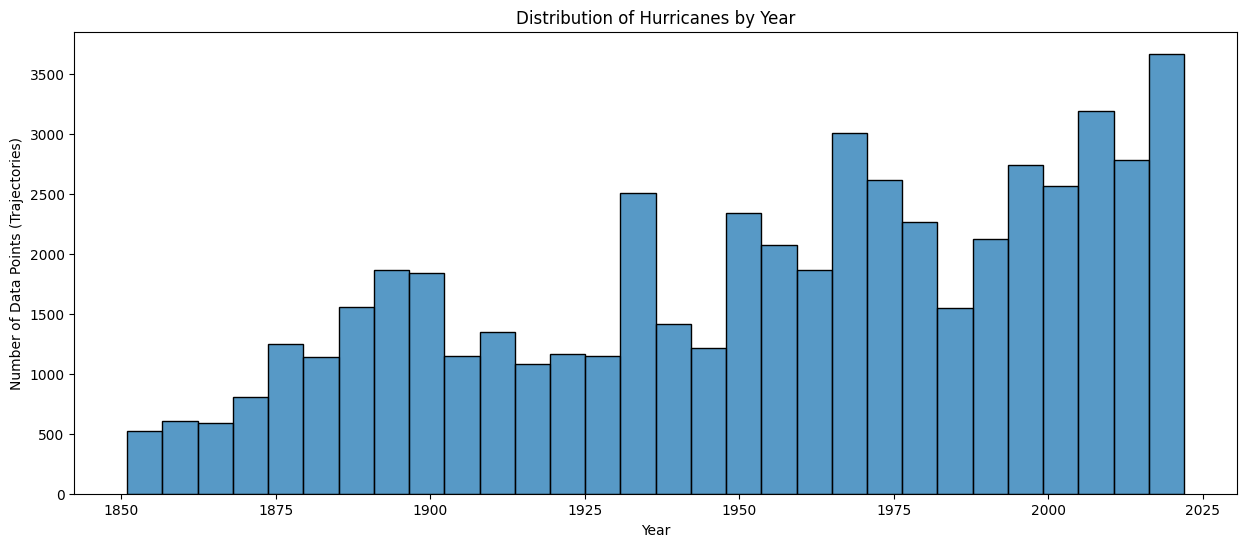

In [17]:
plt.figure(figsize=(15, 6))
sns.histplot(data['Year'], kde=False, bins=30)
plt.title('Distribution of Hurricanes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Data Points (Trajectories)')
plt.show()

### HU (Spaces 20-21, before 4th comma) – Status of system. Options are:
Indicates the intensity and nature of the cyclonic system.
- TD – Tropical cyclone of tropical depression intensity (< 34 knots)
- TS – Tropical cyclone of tropical storm intensity (34-63 knots)
- HU – Tropical cyclone of hurricane intensity (> 64 knots)
- EX – Extratropical cyclone (of any intensity)
- SD – Subtropical cyclone of subtropical depression intensity (< 34 knots)
- SS – Subtropical cyclone of subtropical storm intensity (> 34 knots)

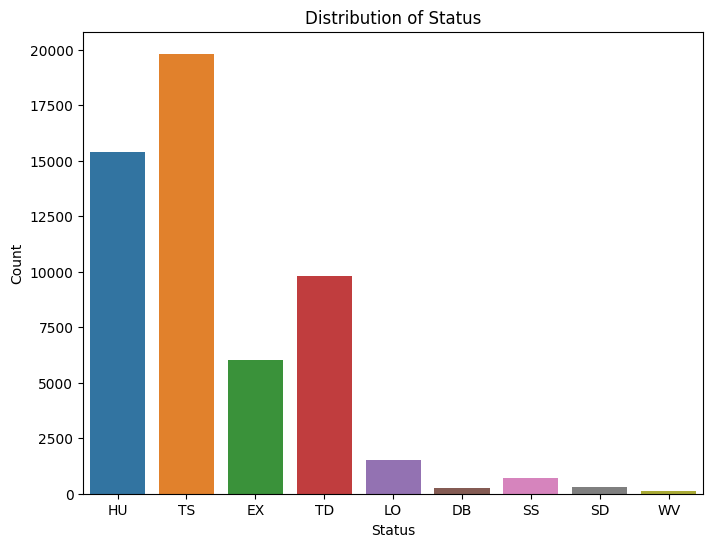

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Status')
plt.title('Distribution of Status')
plt.ylabel('Count')
plt.show()

### L (Space 17, before 3rd comma) – Record identifier (see notes below):
- C – Closest approach to a coast, not followed by a landfall
- G – Genesis
- I – An intensity peak in terms of both pressure and wind
- L – Landfall (center of system crossing a coastline)
- P – Minimum in central pressure
- R – Provides additional detail on the intensity of the cyclone when rapid changes are underway
- S – Change of status of the system
- T – Provides additional detail on the track (position) of the cyclone
- W – Maximum sustained wind speed


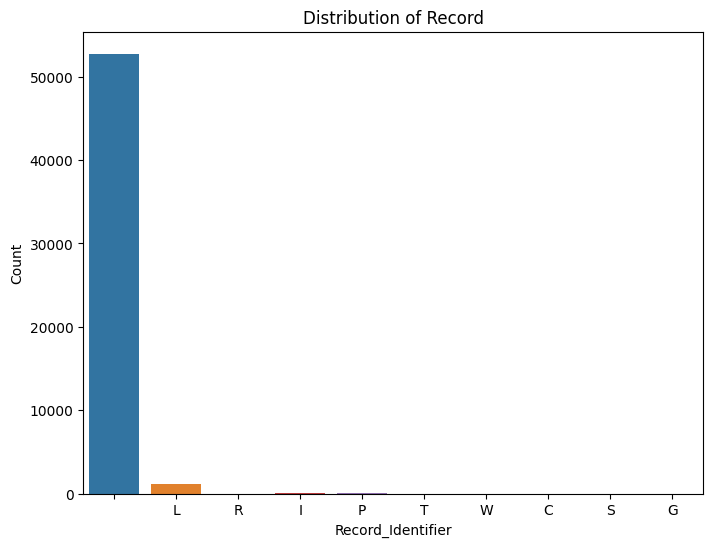

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Record_Identifier')
plt.title('Distribution of Record')
plt.ylabel('Count')
plt.show()

In [42]:
data["Basin"].unique()

array(['AL'], dtype=object)

In [25]:
data["Name"].unique()

array(['UNNAMED', 'ABLE', 'BAKER', 'CHARLIE', 'DOG', 'EASY', 'FOX',
       'GEORGE', 'HOW', 'ITEM', 'JIG', 'KING', 'LOVE', 'MIKE', 'ALICE',
       'BARBARA', 'CAROL', 'DOLLY', 'EDNA', 'FLORENCE', 'GAIL', 'HAZEL',
       'GILDA', 'BRENDA', 'CONNIE', 'DIANE', 'EDITH', 'FLORA', 'GLADYS',
       'IONE', 'HILDA', 'JANET', 'KATIE', 'ANNA', 'BETSY', 'CARLA',
       'DORA', 'ETHEL', 'FLOSSY', 'GRETA', 'AUDREY', 'BERTHA', 'CARRIE',
       'DEBBIE', 'ESTHER', 'FRIEDA', 'ALMA', 'BECKY', 'CLEO', 'DAISY',
       'ELLA', 'FIFI', 'GERDA', 'HELENE', 'ILSA', 'JANICE', 'ARLENE',
       'BEULAH', 'CINDY', 'DEBRA', 'GRACIE', 'HANNAH', 'IRENE', 'JUDITH',
       'ABBY', 'DONNA', 'FRANCES', 'HATTIE', 'JENNY', 'INGA', 'CELIA',
       'GINNY', 'HELENA', 'ISBELL', 'ELENA', 'DOROTHY', 'FAITH', 'HALLIE',
       'INEZ', 'LOIS', 'KENDRA', 'CHLOE', 'DORIA', 'FERN', 'GINGER',
       'HEIDI', 'CANDY', 'BLANCHE', 'CAMILLE', 'EVE', 'FRANCELIA',
       'HOLLY', 'KARA', 'LAURIE', 'MARTHA', 'FELICE', 'BETH', 'KRISTY',
    

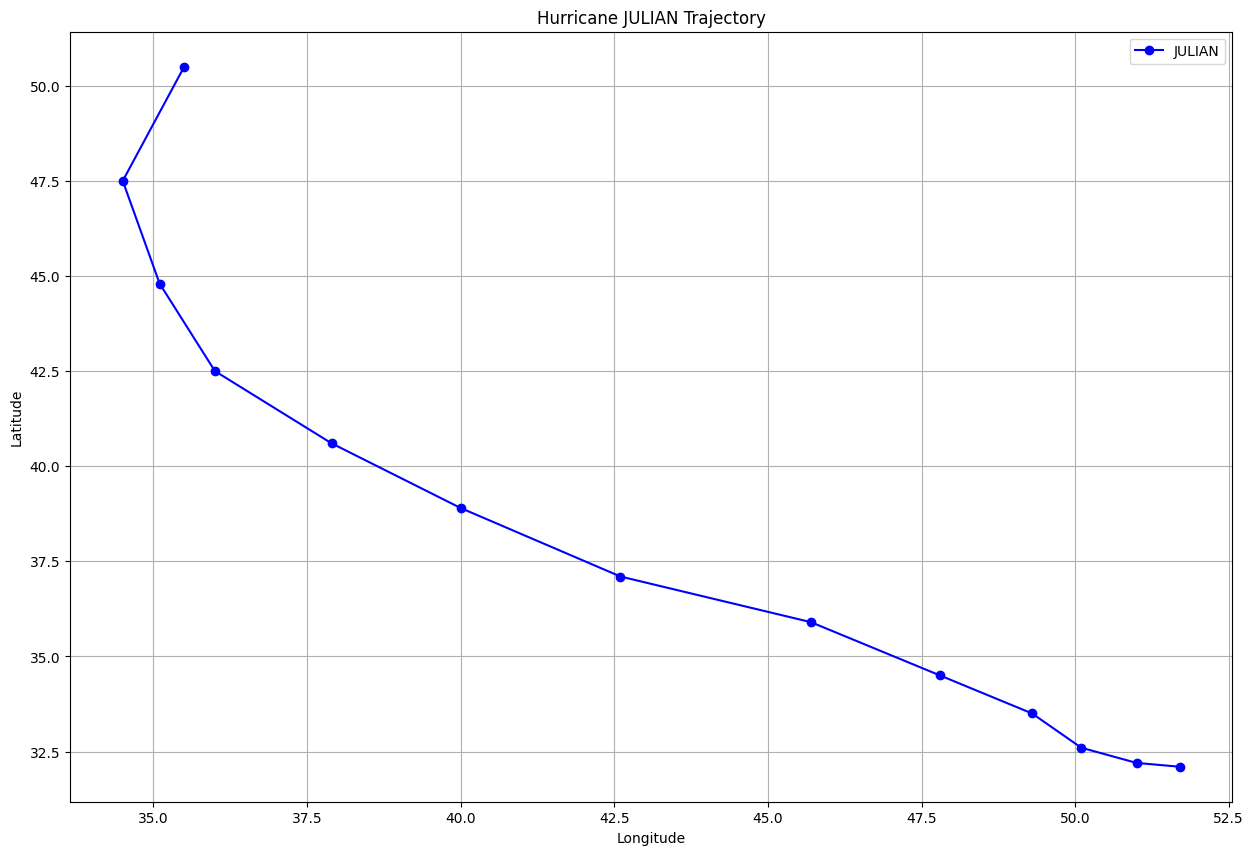

In [26]:
julian_data = data[data['Name'] == 'JULIAN']

plt.figure(figsize=(15, 10))
plt.plot(julian_data['Longitude'], julian_data['Latitude'], label='JULIAN', color='blue', marker='o') 
plt.title('Hurricane JULIAN Trajectory')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)  
plt.show()

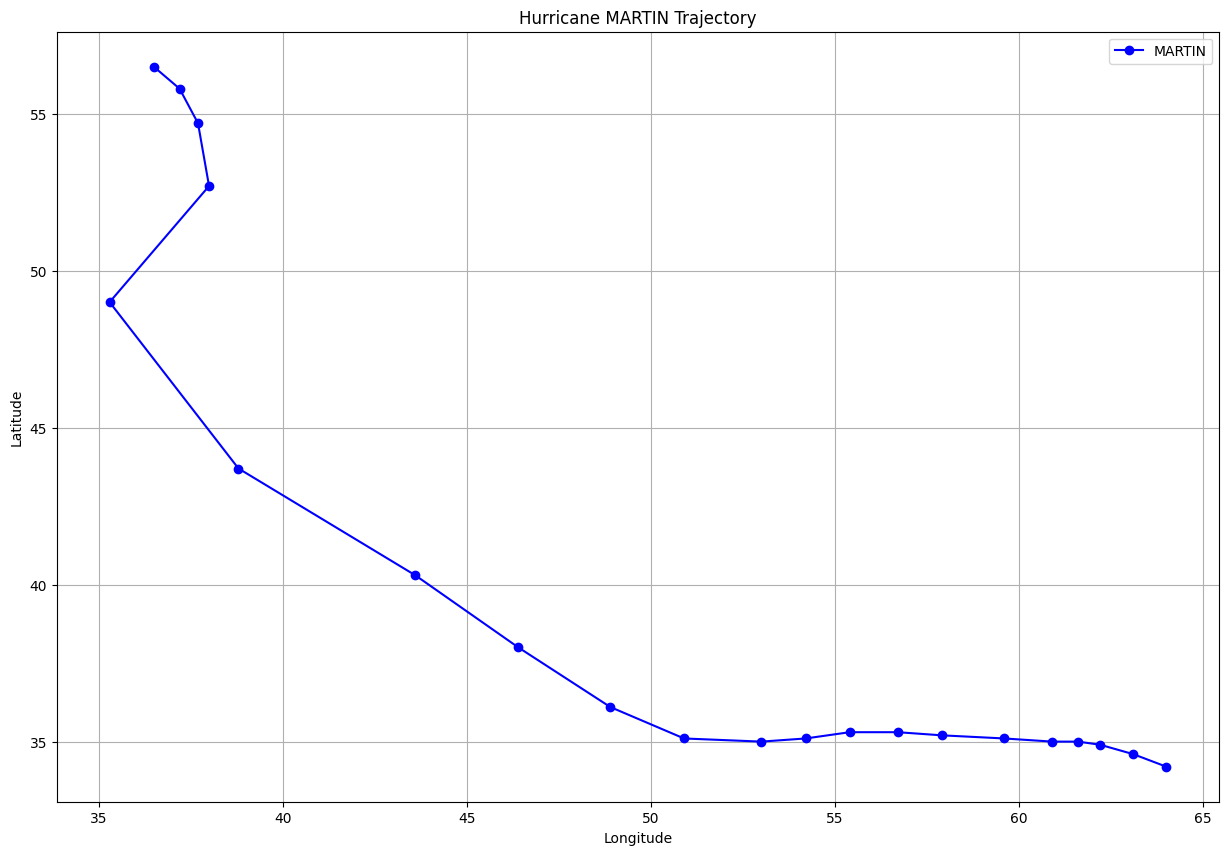

In [28]:
martin_data = data[data['Name'] == 'MARTIN']

plt.figure(figsize=(15, 10))
plt.plot(martin_data['Longitude'], martin_data['Latitude'], label='MARTIN', color='blue', marker='o') 
plt.title('Hurricane MARTIN Trajectory')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)  
plt.show()

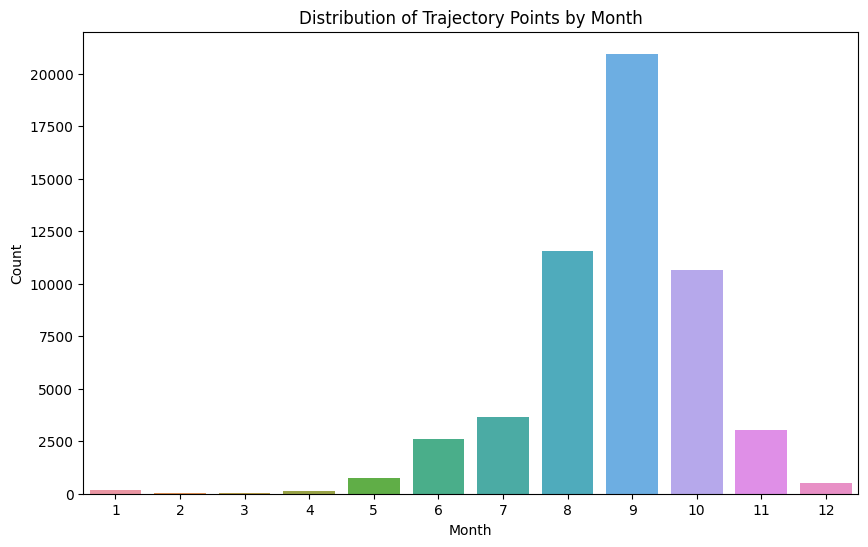

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Month')
plt.title('Distribution of Trajectory Points by Month')
plt.ylabel('Count')
plt.show()


### Hurracaines trajectory in 2022

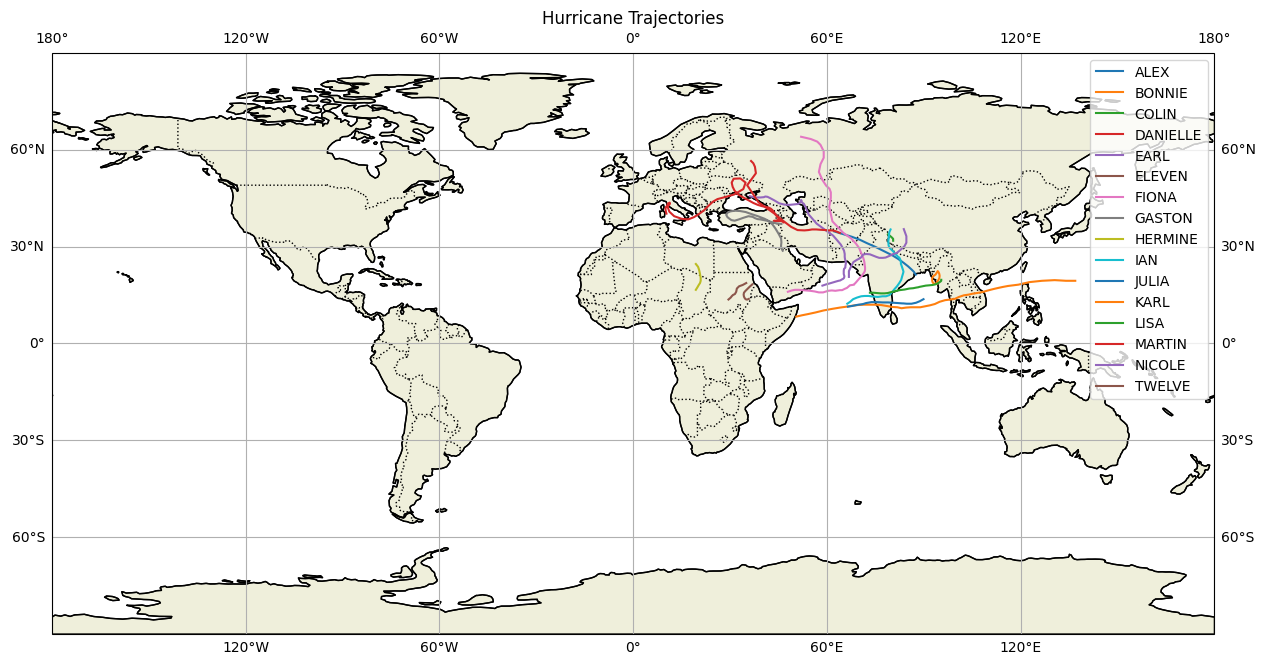

In [41]:
filtered_df = data[(data['Year'] >= 2022)]

fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-180, 180, -90, 90])  # Setting global extent

# Add features to the map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Loop over the unique hurricane names and plot each trajectory
for name, group in filtered_df.groupby('Name'):
    ax.plot(group['Longitude'], group['Latitude'], label=name, transform=ccrs.PlateCarree())

ax.legend()
# Add gridlines and title
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.title('Hurricane Trajectories')

plt.show()